In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
print(np.__version__)

1.21.5


In [3]:
print(tf.__version__)

2.3.0


In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
FOLDER = '..\data'
FN = 'restocracy_all_data.pkl'

In [6]:
with open(os.path.join(FOLDER, FN), 'rb') as fh:
    data = pickle.load(fh)

In [7]:
type(data)

list

In [8]:
len(data)

200

In [9]:
data[0]

{'price': '202 lei',
 'review': ' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. \n Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o

In [10]:
prices = [x['price'] for x in data]
reviews = [x['review'] for x in data]

In [11]:
prices[:5]

['202 lei', '176 lei', '187 lei', '264 lei', '187 lei']

In [12]:
reviews[0][:100]

' \n Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing \n Maize s-a deschis l'

In [13]:
np_prices = np.array([int(x.split(' ')[0]) for x in prices])
np_prices

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288, 266, 229, 133,
       214, 109, 219, 147, 200, 170, 360, 258, 232, 133, 168, 206, 232,
       133, 168, 206, 138, 138, 106, 181, 208, 120, 133, 186, 126, 149,
        82, 130, 189, 114, 208, 184, 226, 118, 130, 155, 141, 128, 141,
       387, 104, 106, 154, 155, 246, 154, 128, 102, 109, 114, 162, 194,
       309, 176, 162, 224, 126, 104,  64, 114, 117, 130, 130, 149,  82,
       107, 229, 253,  91, 187,  91, 251, 131, 142, 114, 138, 115, 109,
       130, 115, 259, 115,  90, 136, 122, 150, 144, 131, 138, 158, 114,
       117, 114, 110, 131, 162, 106, 218, 101, 109, 144, 134, 149, 138,
       130, 101, 115, 133,  96, 165, 120,  70,  88,  98, 101, 149,  94,
       226, 163, 115,  94,  91,  82, 117,  99, 122, 163,  67, 123, 149,
       134, 142,  96, 224,  96, 168, 136, 146, 128,  94, 126, 170, 139,
       109, 123, 107, 115, 128, 104, 146, 197, 122, 150, 128, 106, 130,
       131, 131,  85, 122, 117,  83,  86, 123, 109, 112, 112, 13

In [14]:
np_prices.shape

(200,)

(array([ 3., 11., 16., 37., 26., 32., 16., 11.,  8.,  9.,  6.,  5.,  6.,
         2.,  4.,  4.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 64.  ,  76.92,  89.84, 102.76, 115.68, 128.6 , 141.52, 154.44,
        167.36, 180.28, 193.2 , 206.12, 219.04, 231.96, 244.88, 257.8 ,
        270.72, 283.64, 296.56, 309.48, 322.4 , 335.32, 348.24, 361.16,
        374.08, 387.  ]),
 <BarContainer object of 25 artists>)

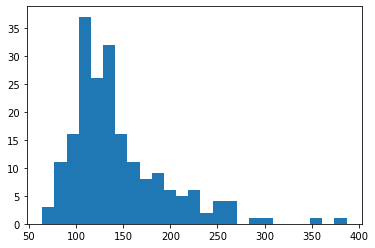

In [15]:
# TODO: plot prices histogram, 25 bins
plt.hist(np_prices, bins=25)

In [16]:
reviews[0].split()[:5]

['Noul', 'restaurant', 'vedeta', 'al', 'Bucurestiului,']

In [17]:
def get_vocabulary(all_docs):
    dct_occurences = {}
    for doc in all_docs:
        words_in_doc = doc.split()
        for word in words_in_doc:
            if word in dct_occurences:
                dct_occurences[word] += 1
            else:
                dct_occurences[word] = 1
    lst_occ = sorted([(w, occ) for w, occ in dct_occurences.items()], key=lambda x: x[1], reverse=True)
    dct_word_to_index = {w[0]:idx+1 for idx, w in enumerate(lst_occ)}
    dct_word_to_index['UNK'] = 0
    dct_index_to_word = {i:w for w,i in dct_word_to_index.items()}
    return lst_occ, dct_word_to_index, dct_index_to_word

In [18]:
o, w2i, i2w = get_vocabulary(reviews)

In [19]:
o[:10]

[('de', 7642),
 ('si', 6195),
 ('in', 3904),
 ('la', 3650),
 ('cu', 3275),
 ('mai', 3019),
 ('ca', 2698),
 ('sa', 2655),
 ('din', 2230),
 ('care', 2147)]

In [20]:
i2w[1]

'de'

In [21]:
i2w[0]

'UNK'

In [22]:
w2i['restaurant']

26

(array([ 4., 19., 41., 50., 35.,  7.,  7.,  8.,  5.,  2.,  3.,  1.,  3.,
         3.,  2.,  1.,  0.,  0.,  0.,  1.,  2.,  0.,  2.,  0.,  2.,  0.,
         0.,  0.,  0.,  2.]),
 array([  34.,  205.,  376.,  547.,  718.,  889., 1060., 1231., 1402.,
        1573., 1744., 1915., 2086., 2257., 2428., 2599., 2770., 2941.,
        3112., 3283., 3454., 3625., 3796., 3967., 4138., 4309., 4480.,
        4651., 4822., 4993., 5164.]),
 <BarContainer object of 30 artists>)

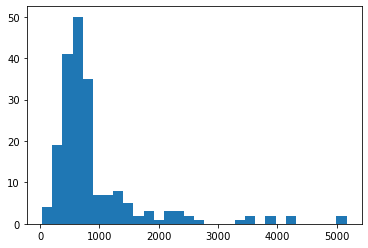

In [23]:
reviews_lens = [len(x.split()) for x in reviews]
plt.hist(reviews_lens, bins=30)

In [24]:
def review_to_tokens(review, dct_w2i, unk_word_idx=0, max_words=1000):
    obs_tokens = []
    for word in review.split():
        obs_tokens.append(dct_w2i.get(word, unk_word_idx))
    diff = max(0, max_words - len(obs_tokens))
    obs_tokens = obs_tokens + [unk_word_idx] * diff
    obs_tokens = obs_tokens[:max_words]
    return obs_tokens

def tokens_to_review(tokens, dct_i2w):
    # TODO: complete list comprehension for generating review from tokens
    return " ".join([dct_i2w[t] for t in tokens])

In [25]:
o1 = review_to_tokens(reviews[0], dct_w2i=w2i)
o1[:10]

[2181, 26, 2751, 37, 244, 15, 1377, 4219, 1, 2420]

In [26]:
tokens_to_review(o1, i2w)

'Noul restaurant vedeta al Bucurestiului, o constructie geniala de marketing Maize s-a deschis la inceputul lui noiembrie 2017 in mansarda unui (fel de) bloc cu doua etaje de pe eleganta strada Paris, aproape de Piata Dorobantilor. Poti sa o iei, la fel de bine, si ca pe o casa veche din Bucurestiul vechi, facuta fara imaginatie, sau cu economie la arhitect. Casa e renovata recent, iar zona e atat de frumoasa si de aristocratica, incat orice casa de acolo nu poate sa fie decat frumoasa si ea, indiferent cum ar arata si in ce stare ar fi. Daca cei care au construit batrana casa nu au adus arhitecti cu imaginatie, cei care au transformat mansarda in restaurantul Maize au facut-o. Totul arata foarte bine acolo, au pus in valoare fiecare coltisor si detaliu, au reusit sa o umple si de lumina, si au facut loc si bucatariei chiar in mijloc, cu plite si gratare cu tot, dupa cum se vede si in poze, care ma scutesc de mai mult scris. Acolo, sus, au si o mica terasa pe acoperis, foarte frumoasa 

In [27]:
np_prices[:10]

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288])

In [28]:
# TODO: plot histogram of review lenghts
lst_obs = [review_to_tokens(review=x, dct_w2i=w2i) for x in reviews]
lens = [len(x) for x in lst_obs]
np.unique(lens)

array([1000])

In [29]:
new_review = 'Am fost la un restarant la care am mancat sushi'
new_review_tokens = review_to_tokens(new_review, w2i)
new_review_tokens[:15]

[57, 24, 4, 12, 0, 4, 10, 18, 257, 891, 0, 0, 0, 0, 0]

In [30]:
tokens_to_review(new_review_tokens, i2w)

'Am fost la un UNK la care am mancat sushi UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK UNK U

In [31]:
X = [review_to_tokens(x, w2i) for x in reviews]

In [32]:
np_X = np.array(X)
np_X.shape

(200, 1000)

In [33]:
np.set_printoptions(precision=5, suppress=True, linewidth=500)
np_X[:20,-16:]

array([[10725,     5,  3085,     4,   277,     2,     4,  6841,    54,     4,   887,     4,    65,     2,     4,    19],
       [    9,    68,    49,  6883,  1998,  1545,  1001,   171,   308,     9,   478,  1388,  1801,   533,     5,  4254],
       [ 1808,   171, 10859,  3622,    25,   902,     1,  1462,   116, 10860,     1,     4,  5265,     4, 10861,     2],
       [  152,     3,  1564,  6975,    30,   702,   245,  2207,    25,     1,   128,   334,    85,     3,   457,   122],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
       [ 5390,    17,   167,   368,   304,     8,    79,  7170,   152,    24,  1380,    85,   389,   116,   349,   375],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,    

In [34]:
np_y = np_prices
np_y

array([202, 176, 187, 264, 187, 160, 133, 182, 256, 288, 266, 229, 133, 214, 109, 219, 147, 200, 170, 360, 258, 232, 133, 168, 206, 232, 133, 168, 206, 138, 138, 106, 181, 208, 120, 133, 186, 126, 149,  82, 130, 189, 114, 208, 184, 226, 118, 130, 155, 141, 128, 141, 387, 104, 106, 154, 155, 246, 154, 128, 102, 109, 114, 162, 194, 309, 176, 162, 224, 126, 104,  64, 114, 117, 130, 130, 149,  82, 107, 229, 253,  91, 187,  91, 251, 131, 142, 114, 138, 115, 109, 130, 115, 259, 115,  90, 136, 122,
       150, 144, 131, 138, 158, 114, 117, 114, 110, 131, 162, 106, 218, 101, 109, 144, 134, 149, 138, 130, 101, 115, 133,  96, 165, 120,  70,  88,  98, 101, 149,  94, 226, 163, 115,  94,  91,  82, 117,  99, 122, 163,  67, 123, 149, 134, 142,  96, 224,  96, 168, 136, 146, 128,  94, 126, 170, 139, 109, 123, 107, 115, 128, 104, 146, 197, 122, 150, 128, 106, 130, 131, 131,  85, 122, 117,  83,  86, 123, 109, 112, 112, 130, 109, 162, 126, 136, 120,  77, 107,  80, 107, 112, 117, 109, 122,  83, 115,
      

In [35]:
# TODO: prepare train/test
from sklearn.model_selection import train_test_split as splitter
x_trn, x_tst, y_trn, y_tst = splitter(np_X, np_y, test_size=0.2)

In [36]:
x_trn.shape

(160, 1000)

In [37]:
x_tst.shape

(40, 1000)

In [38]:
x_dev = x_tst[:20]
y_dev = y_tst[:20]
x_test = x_tst[20:]
y_test = y_tst[20:]
print(x_dev.shape)
print(x_test.shape)

(20, 1000)
(20, 1000)


In [39]:
x_trn[:3,:5]

array([[ 3517,    12,    26,    17,   610],
       [ 6802,    15,  1205,  2137,  8998],
       [16910, 16911, 16912,    23, 16913]])

In [40]:
EMBED_SIZE = 10
print("For vocab size {}, naive (one-hote) data size is {} GB".format(len(w2i), len(reviews) * x_trn.shape[1] * len(w2i) // (1024**3)))
print("For embeds: {} MB".format(len(reviews) * x_trn.shape[1] * EMBED_SIZE * 4 // (1024**2)))

For vocab size 22000, naive (one-hote) data size is 4 GB
For embeds: 7 MB


In [50]:
tf_inp = tf.keras.layers.Input((1_000,), name='token_inputs', dtype=tf.int32,)
print(tf_inp)
# TODO: project from vocab size to continous semantic space
layer_emb = tf.keras.layers.Embedding(len(w2i), EMBED_SIZE,  name='tokens_to_vectors')
tf_emb = layer_emb(tf_inp)
print(tf_emb)
# TODO: flatten to one vector per obs
tf_x = tf.keras.layers.Flatten(name='matrix_to_vector')(tf_emb)
print(tf_x)
# TODO: linear transform
tf_x = tf.keras.layers.Dense(64, name='linear_transform')(tf_x)
print(tf_x)
# TODO: activate
tf_x = tf.keras.layers.Activation('relu', name='relu_activation')(tf_x)

tf_x = tf.keras.layers.Dropout(0.5, name='pre_readout_dropout')(tf_x)
# finally we have our regression output
tf_out = tf.keras.layers.Dense(1, name='readout')(tf_x)
model = tf.keras.models.Model(tf_inp, tf_out)

Tensor("token_inputs_3:0", shape=(None, 1000), dtype=int32)
Tensor("tokens_to_vectors/embedding_lookup_3/Identity_1:0", shape=(None, 1000, 10), dtype=float32)
Tensor("matrix_to_vector/Reshape_2:0", shape=(None, 10000), dtype=float32)
Tensor("linear_transform/BiasAdd:0", shape=(None, 64), dtype=float32)


In [51]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
token_inputs (InputLayer)    [(None, 1000)]            0         
_________________________________________________________________
tokens_to_vectors (Embedding (None, 1000, 10)          220000    
_________________________________________________________________
matrix_to_vector (Flatten)   (None, 10000)             0         
_________________________________________________________________
linear_transform (Dense)     (None, 64)                640064    
_________________________________________________________________
relu_activation (Activation) (None, 64)                0         
_________________________________________________________________
pre_readout_dropout (Dropout (None, 64)                0         
_________________________________________________________________
readout (Dense)              (None, 1)                

In [52]:
model.compile(optimizer='adam', loss='mae')

In [53]:
model.fit(x=x_trn, y=y_trn, validation_data=(x_dev, y_dev), epochs=50, batch_size=14)

Epoch 1/50
12/12 [==============================] - 0s 19ms/step - loss: 140.4699 - val_loss: 140.2502
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 129.0073 - val_loss: 118.8731
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 99.5901 - val_loss: 71.2637
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 57.2300 - val_loss: 34.2118
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 49.3695 - val_loss: 32.3123
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 47.0985 - val_loss: 33.1912
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 39.2726 - val_loss: 33.9964
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 35.8492 - val_loss: 31.0868
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 34.2754 - val_loss: 36.4048
Epoch 10/50
12/12 [==============================] - 0s 6ms/step - loss: 37.2742 - val_loss: 34

In [57]:
yh_test = model.predict(x_test)
print(y_test.ravel())
print(yh_test.ravel().astype('int'))
mean_prc_err = np.abs(yh_test.ravel() - y_test.ravel()) / y_test.ravel()
print(mean_prc_err)

[ 83 186 117 117 181 114 130 123 126 168  96 206  91 387 149 288  91 109 194 126]
[116 150 139 123 135 127 122 137 117 161 124 188 114 156 134 118 102 120 108 150]
[0.40363 0.19025 0.19363 0.0575  0.25166 0.12062 0.05808 0.11995 0.06464 0.03964 0.29414 0.08502 0.25779 0.59638 0.09682 0.58775 0.12435 0.1036  0.43883 0.19049]


### TODO: 
 - prepare grid search
 - write functions for result qualitative analysis
 - explore solution space and show performance results

In [67]:
tf.keras.layers.GlobalMaxPool1D


tensorflow.python.keras.layers.pooling.GlobalMaxPooling1D

In [125]:
def model_factory(inp, 
                  vocab,  
                  layers=[32,8], conv=False, embed_size=10, activation='relu', 
                  dropout_readout=0.5, dropout_hidden=0, multi_column_conv=False,
                  optim='adam', loss='mse'
                 ):
    tf_inp = tf.keras.layers.Input((inp,), name='token_inputs', dtype=tf.int32,)
    layer_emb = tf.keras.layers.Embedding(vocab, embed_size,  name='tokens_to_vectors')
    tf_x = layer_emb(tf_inp)
    if not conv:
        tf_x = tf.keras.layers.Flatten(name='matrix_to_vector')(tf_x)        
    else:
        layers = reversed(layers)
        # three conv columns
        tf_x1, tf_x2, tf_x3 = tf_x, tf_x, tf_x
    for i, layer in enumerate(layers):
        if conv:
            # now we create a few of convolution on same data
            tf_x1 = tf.keras.layers.Conv1D(filters=layer, kernel_size=3, strides=3, name='c1conv_{}_f{}'.format(i, layer))(tf_x1)
            if multi_column_conv:
                tf_x2 = tf.keras.layers.Conv1D(filters=layer, kernel_size=5, strides=5, name='c2conv_{}_f{}'.format(i, layer))(tf_x2)
                tf_x3 = tf.keras.layers.Conv1D(filters=layer, kernel_size=7, strides=7, name='c3conv_{}_f{}'.format(i, layer))(tf_x3)
        else:
            tf_x = tf.keras.layers.Dense(layer, name='linear_{}_{}'.format(i, layer))(tf_x)
            tf_x = tf.keras.layers.Activation(activation, name='{}_{}'.format(activation, i))(tf_x)
            if dropout_hidden > 0 and i < (len(layers) - 1):
                tf_x = tf.keras.layers.Dropout(0.5, name='hid_drop_{}_{}'.format(i, dropout_hidden))(tf_x)
    if conv:
        tf_x1 = tf.keras.layers.GlobalMaxPool1D(name='gmp1')(tf_x1)
        if multi_column_conv:
            tf_x2 = tf.keras.layers.GlobalMaxPool1D(name='gmp2')(tf_x2)
            tf_x3 = tf.keras.layers.GlobalMaxPool1D(name='gmp3')(tf_x3)
            tf_x = tf.keras.layers.concatenate([tf_x1, tf_x2, tf_x3])
        else:
            tf_x = tf_x1
    if dropout_readout > 0:
        tf_x = tf.keras.layers.Dropout(0.5, name='pre_readout_drop_{}'.format(dropout_readout))(tf_x)
    
    tf_out = tf.keras.layers.Dense(1, name='readout')(tf_x)
    m = tf.keras.models.Model(tf_inp, tf_out)
    m.compile(optimizer=optim, loss=loss)
    m.summary()
    return m

def final_eval(m, x_test, y_test):
    yh_test = m.predict(x_test)
    y_test = y_test.ravel()
    yh_test = yh_test.ravel()
    return (np.abs(yh_test - y_test) / y_test).mean()

In [126]:
dct_grid_space = {
    'layers' : [
        [128, 32, 8],
        [64],
        [64, 8],
    ],
    'conv' : [True, False],
    'embed_size' : [8, 32],
}

grid_params = []
grid_values = []
for k in dct_grid_space:
    grid_params.append(k)
    grid_values.append(dct_grid_space[k])
import itertools
grid_combs = list(itertools.product(*grid_values))

In [127]:
import pandas as pd
results = {
    'MODEL' : [],
    'RESULT': [],
}
for grid_iter, grid_iter in enumerate(range(len(grid_combs))):
    dct_curr_params = {k:v for k,v in zip(grid_params, grid_combs[grid_iter])}
    print('Running iteration {}/{}: {}'.format(grid_iter+1,len(grid_combs), dct_curr_params))
    model = model_factory(
        inp=1_000,
        vocab=len(w2i),
        **dct_curr_params,
    )
    cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
    )
    hist = model.fit(
        x=x_trn, 
        y=y_trn, 
        validation_data=(x_dev, y_dev), 
        epochs=100, 
        batch_size=14, 
        callbacks=[cb],
        verbose=0,
    )
    res = final_eval(
        m=model, 
        x_test=x_test, 
        y_test=y_test
    )
    results['MODEL'].append("{},C:{},E:{}".format(dct_curr_params['layers'],dct_curr_params['conv'],dct_curr_params['embed_size']))
    results['RESULT'].append(res)
pd.DataFrame(results).sort_values('RESULT')

Running iteration 1/12: {'layers': [128, 32, 8], 'conv': True, 'embed_size': 8}
Model: "functional_243"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
token_inputs (InputLayer)    [(None, 1000)]            0         
_________________________________________________________________
tokens_to_vectors (Embedding (None, 1000, 8)           176000    
_________________________________________________________________
c1conv_0_f8 (Conv1D)         (None, 333, 8)            200       
_________________________________________________________________
c1conv_1_f32 (Conv1D)        (None, 111, 32)           800       
_________________________________________________________________
c1conv_2_f128 (Conv1D)       (None, 37, 128)           12416     
_________________________________________________________________
gmp1 (GlobalMaxPooling1D)    (None, 128)               0         
______________________________________

Running iteration 5/12: {'layers': [64], 'conv': True, 'embed_size': 8}
Model: "functional_251"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
token_inputs (InputLayer)    [(None, 1000)]            0         
_________________________________________________________________
tokens_to_vectors (Embedding (None, 1000, 8)           176000    
_________________________________________________________________
c1conv_0_f64 (Conv1D)        (None, 333, 64)           1600      
_________________________________________________________________
gmp1 (GlobalMaxPooling1D)    (None, 64)                0         
_________________________________________________________________
pre_readout_drop_0.5 (Dropou (None, 64)                0         
_________________________________________________________________
readout (Dense)              (None, 1)                 65        
Total params: 177,665
Trainable params: 177,66

Running iteration 9/12: {'layers': [64, 8], 'conv': True, 'embed_size': 8}
Model: "functional_259"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
token_inputs (InputLayer)    [(None, 1000)]            0         
_________________________________________________________________
tokens_to_vectors (Embedding (None, 1000, 8)           176000    
_________________________________________________________________
c1conv_0_f8 (Conv1D)         (None, 333, 8)            200       
_________________________________________________________________
c1conv_1_f64 (Conv1D)        (None, 111, 64)           1600      
_________________________________________________________________
gmp1 (GlobalMaxPooling1D)    (None, 64)                0         
_________________________________________________________________
pre_readout_drop_0.5 (Dropou (None, 64)                0         
___________________________________________

,MODEL,RESULT
11,"[64, 8],C:False,E:32",0.212101
2,"[128, 32, 8],C:False,E:8",0.217689
3,"[128, 32, 8],C:False,E:32",0.230081
6,"[64],C:False,E:8",0.239843
4,"[64],C:True,E:8",0.252651
10,"[64, 8],C:False,E:8",0.266339
9,"[64, 8],C:True,E:32",0.269560
7,"[64],C:False,E:32",0.291097
5,"[64],C:True,E:32",0.296806
8,"[64, 8],C:True,E:8",0.303942


In [89]:
print(pd.DataFrame(results).sort_values('RESULT'))

                                               MODEL    RESULT
7  {'layers': [64, 16], 'conv': False, 'embed_siz...  0.206557
6  {'layers': [64, 16], 'conv': False, 'embed_siz...  0.208043
1  {'layers': [128], 'conv': True, 'embed_size': 32}  0.212973
3  {'layers': [128], 'conv': False, 'embed_size':...  0.223192
0  {'layers': [128], 'conv': True, 'embed_size': 10}  0.234100
4  {'layers': [64, 16], 'conv': True, 'embed_size...  0.239393
5  {'layers': [64, 16], 'conv': True, 'embed_size...  0.241737
2  {'layers': [128], 'conv': False, 'embed_size':...  0.246123


In [87]:
results

{'MODEL': ["{'layers': [128], 'conv': True, 'embed_size': 10}",
  "{'layers': [128], 'conv': True, 'embed_size': 32}",
  "{'layers': [128], 'conv': False, 'embed_size': 10}",
  "{'layers': [128], 'conv': False, 'embed_size': 32}",
  "{'layers': [64, 16], 'conv': True, 'embed_size': 10}",
  "{'layers': [64, 16], 'conv': True, 'embed_size': 32}",
  "{'layers': [64, 16], 'conv': False, 'embed_size': 10}",
  "{'layers': [64, 16], 'conv': False, 'embed_size': 32}"],
 'RESULT': [0.23409974093082986,
  0.2129726093213153,
  0.2461226547530063,
  0.22319211295735722,
  0.23939296224094905,
  0.2417370345960695,
  0.20804274040642304,
  0.20655745336885573]}